<a href="https://colab.research.google.com/github/bsse1009/Anova/blob/main/anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!cp "drive/My Drive/dataSets/stackOverFlow.csv" .

In [5]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

In [6]:
data = pd.read_csv("stackOverFlow.csv")
data.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [7]:
data = data.replace('NA', np.nan)
lang_desired_python= data['LanguageDesireNextYear'].str.contains('Python', na= False)
years_python=data[lang_desired_python]['YearsCode']
years_python = years_python.replace('Less than 1 year',0.5)
years_python = years_python.replace('More than 50 years',55)
years_python=pd.to_numeric(years_python)
years_python=years_python[years_python>0]
print(years_python)

1         7.0
2         4.0
8         6.0
9         8.0
12       35.0
         ... 
64429     1.0
64430     3.0
64433    30.0
64446     6.0
64447     6.0
Name: YearsCode, Length: 25206, dtype: float64


In [8]:
lang_desired_dotNet= data['LanguageDesireNextYear'].str.contains('C#', na= False)
years_dotNet=data[lang_desired_dotNet]['YearsCode']
years_dotNet = years_dotNet.replace('Less than 1 year',0.5)
years_dotNet = years_dotNet.replace('More than 50 years',55)
years_dotNet=pd.to_numeric(years_dotNet)
years_dotNet=years_dotNet[years_dotNet>0]
print(years_dotNet)

0        36.0
6         6.0
16        7.0
18        9.0
20        7.0
         ... 
64413     8.0
64423     0.5
64428     5.0
64441     7.0
64446     6.0
Name: YearsCode, Length: 13055, dtype: float64


In [9]:
lang_desired_javaScript= data['LanguageDesireNextYear'].str.contains('JavaScript', na= False)
years_javaScript=data[lang_desired_javaScript]['YearsCode']
years_javaScript = years_javaScript.replace('Less than 1 year',0.5)
years_javaScript = years_javaScript.replace('More than 50 years',55)
years_javaScript=pd.to_numeric(years_javaScript)
years_javaScript=years_javaScript[years_javaScript>0]
print(years_javaScript)

0        36.0
5         6.0
7        17.0
9         8.0
10       10.0
         ... 
64423     0.5
64429     1.0
64430     3.0
64433    30.0
64446     6.0
Name: YearsCode, Length: 24741, dtype: float64


In [10]:
lang_desired_HTML_CSS= data['LanguageDesireNextYear'].str.contains('HTML/CSS', na= False)
years_HTML_CSS=data[lang_desired_HTML_CSS]['YearsCode']
years_HTML_CSS = years_HTML_CSS.replace('Less than 1 year',0.5)
years_HTML_CSS = years_HTML_CSS.replace('More than 50 years',55)
years_HTML_CSS=pd.to_numeric(years_HTML_CSS)
years_HTML_CSS=years_HTML_CSS[years_HTML_CSS>0]
print(years_HTML_CSS)

0        36.0
5         6.0
6         6.0
9         8.0
11        7.0
         ... 
64430     3.0
64433    30.0
64437     0.5
64446     6.0
64453     3.0
Name: YearsCode, Length: 19707, dtype: float64


In [11]:
print(years_python.describe())
print(years_python.median())
print(years_python.mode())

print(years_dotNet.describe())
print(years_dotNet.median())
print(years_dotNet.mode())

print(years_javaScript.describe())
print(years_javaScript.median())
print(years_javaScript.mode())

print(years_HTML_CSS.describe())
print(years_HTML_CSS.median())
print(years_HTML_CSS.mode())

count    25206.000000
mean        11.933429
std          9.389176
min          0.500000
25%          5.000000
50%          9.000000
75%         15.000000
max         55.000000
Name: YearsCode, dtype: float64
9.0
0    5.0
dtype: float64
count    13055.000000
mean        13.850134
std         10.141807
min          0.500000
25%          6.000000
50%         11.000000
75%         20.000000
max         55.000000
Name: YearsCode, dtype: float64
11.0
0    10.0
dtype: float64
count    24741.000000
mean        12.262742
std          9.372488
min          0.500000
25%          5.000000
50%         10.000000
75%         16.000000
max         55.000000
Name: YearsCode, dtype: float64
10.0
0    10.0
dtype: float64
count    19707.000000
mean        12.723778
std          9.683967
min          0.500000
25%          6.000000
50%         10.000000
75%         17.000000
max         55.000000
Name: YearsCode, dtype: float64
10.0
0    10.0
dtype: float64


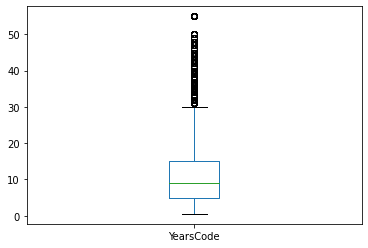

In [12]:
years_python.plot.box()

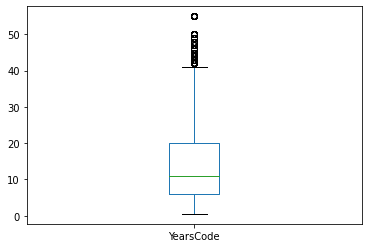

In [13]:
years_dotNet.plot.box()

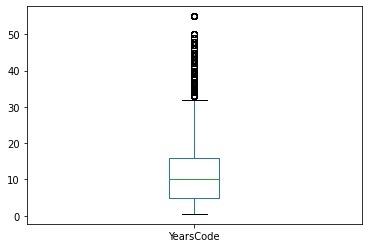

In [14]:
years_javaScript.plot.box()

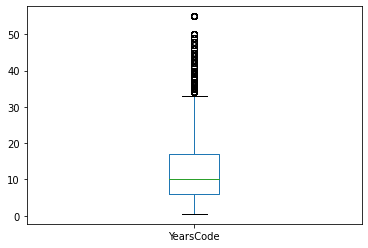

In [15]:
years_HTML_CSS.plot.box()

In [16]:
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

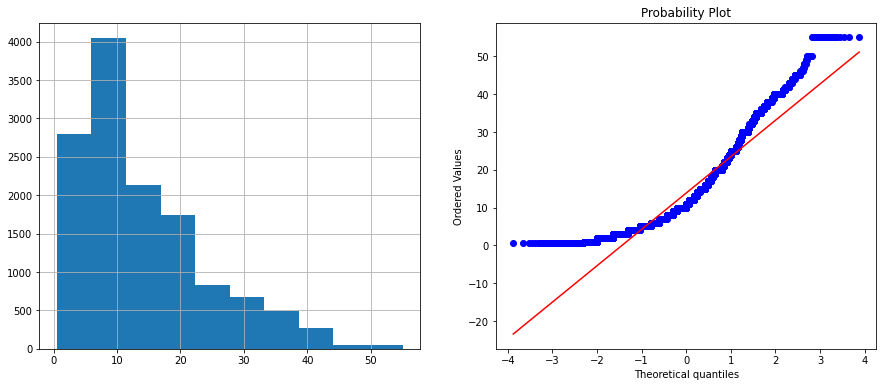

In [17]:
years_dotNet = pd.DataFrame(years_dotNet, columns=['YearsCode'])
diagnostic_plots(years_dotNet, 'YearsCode')

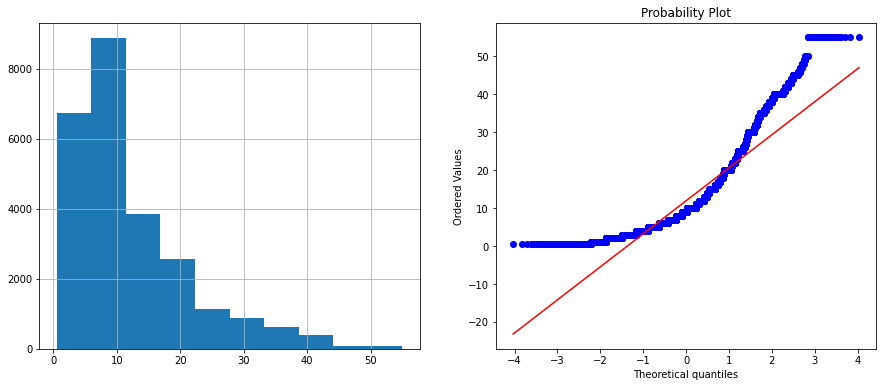

In [18]:
years_python = pd.DataFrame(years_python, columns=['YearsCode'])
diagnostic_plots(years_python, 'YearsCode')

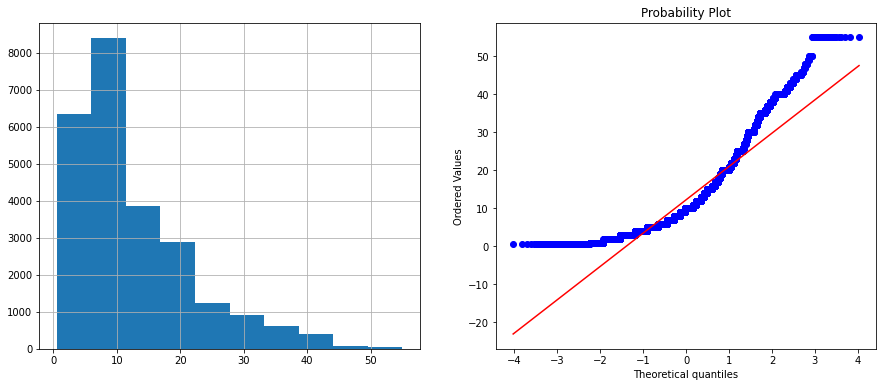

In [19]:
years_javaScript = pd.DataFrame(years_javaScript, columns=['YearsCode'])
diagnostic_plots(years_javaScript, 'YearsCode')

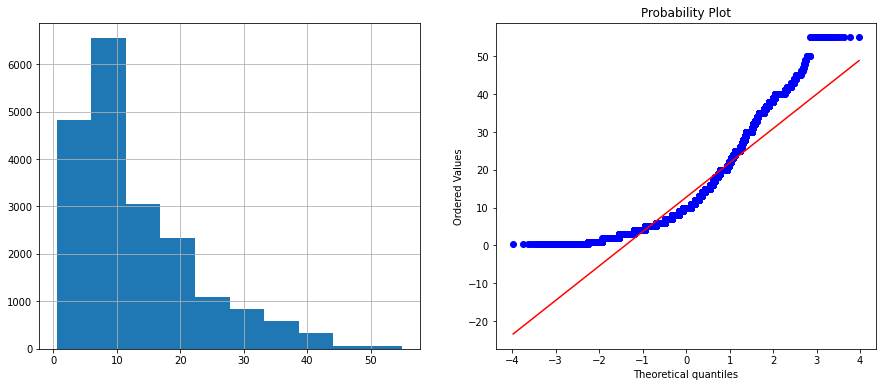

In [20]:
years_HTML_CSS = pd.DataFrame(years_HTML_CSS, columns=['YearsCode'])
diagnostic_plots(years_HTML_CSS, 'YearsCode')

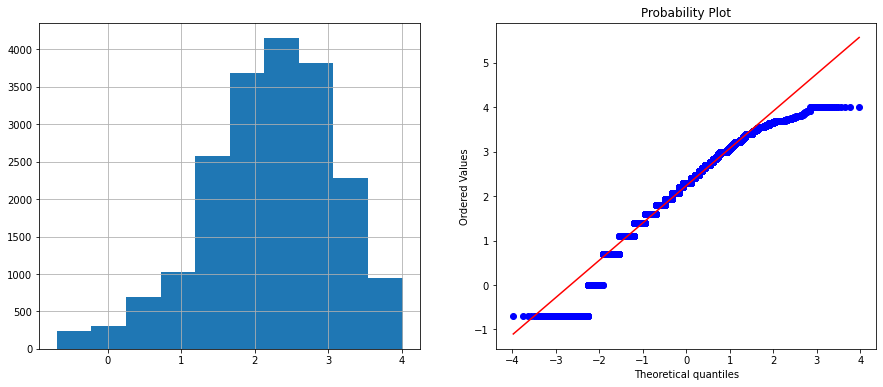

In [21]:
years_HTML_CSS['LogYearsCode'] = np.log(pd.to_numeric(years_HTML_CSS['YearsCode']))
diagnostic_plots(years_HTML_CSS, 'LogYearsCode')

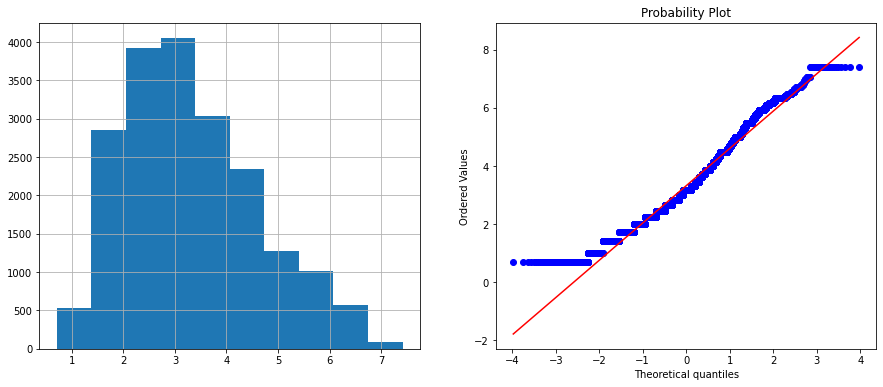

In [22]:
years_HTML_CSS['squarRootYearsCode'] = pd.to_numeric(years_HTML_CSS['YearsCode'])**(1/2)
diagnostic_plots(years_HTML_CSS, 'squarRootYearsCode')

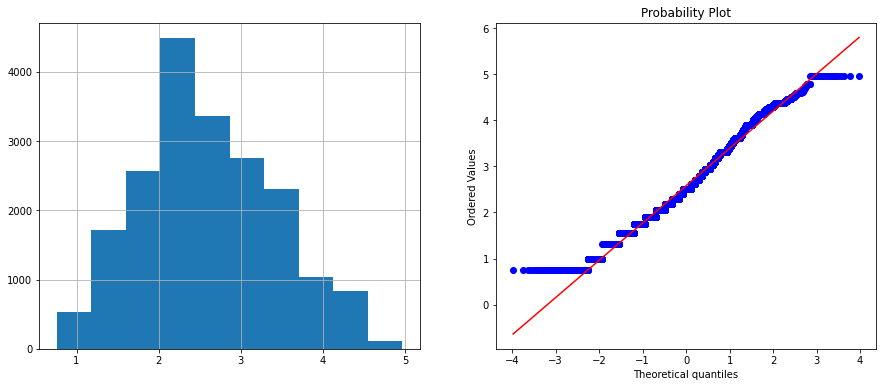

In [35]:
years_HTML_CSS['expYearsCode1'] = pd.to_numeric(years_HTML_CSS['YearsCode'])**(2/5)
diagnostic_plots(years_HTML_CSS, 'expYearsCode1')

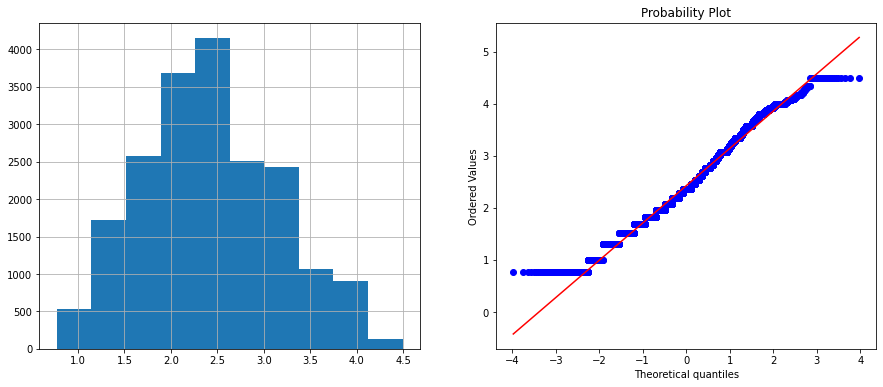

In [41]:
years_HTML_CSS['expYearsCode2'] = pd.to_numeric(years_HTML_CSS['YearsCode'])**(3/8)
diagnostic_plots(years_HTML_CSS, 'expYearsCode2')

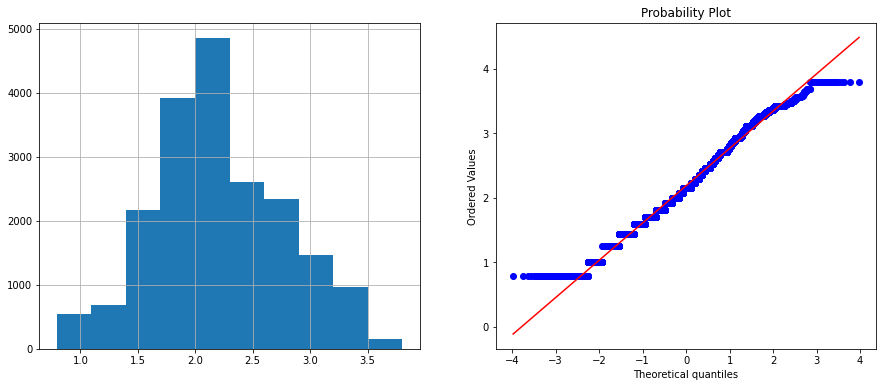

In [37]:
years_HTML_CSS['expYearsCode3'] = pd.to_numeric(years_HTML_CSS['YearsCode'])**(1/3)
diagnostic_plots(years_HTML_CSS, 'expYearsCode3')

Optimal lambda:  0.12407045074106315


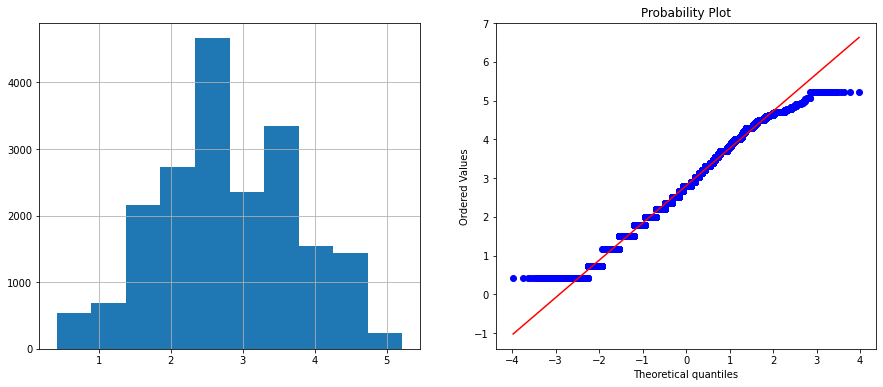

In [33]:
years_HTML_CSS['YearsCode_boxcox'], param = stats.boxcox(years_HTML_CSS.YearsCode+1) # you can vary the exponent as needed

print('Optimal lambda: ', param)

diagnostic_plots(years_HTML_CSS, 'YearsCode_boxcox')

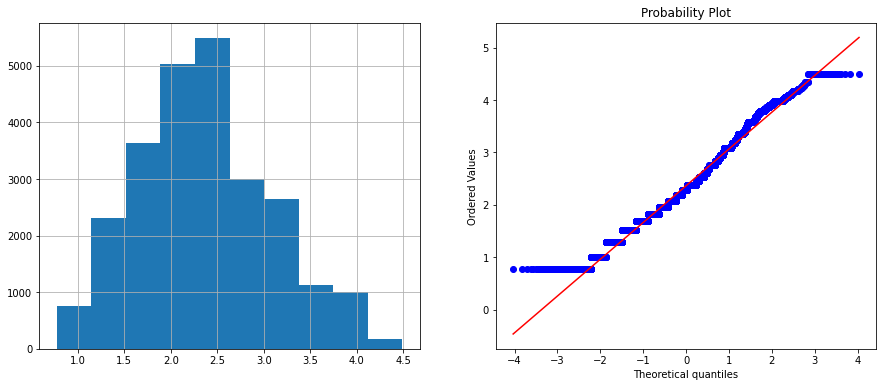

In [42]:
years_python['expYearsCode2'] = pd.to_numeric(years_python['YearsCode'])**(3/8)
diagnostic_plots(years_python, 'expYearsCode2')

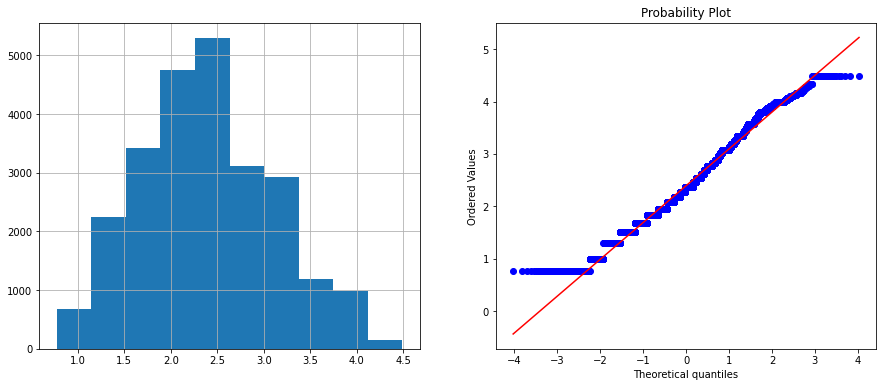

In [43]:
years_javaScript['expYearsCode2'] = pd.to_numeric(years_javaScript['YearsCode'])**(3/8)
diagnostic_plots(years_javaScript, 'expYearsCode2')

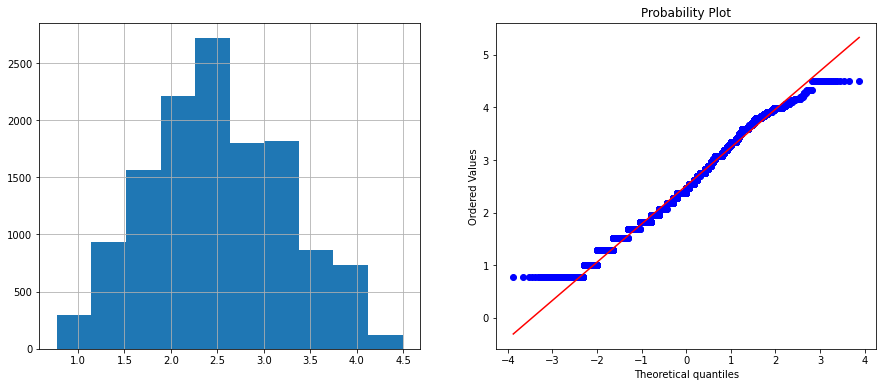

In [46]:
years_dotNet['expYearsCode2'] = pd.to_numeric(years_dotNet['YearsCode'])**(3/8)
diagnostic_plots(years_dotNet, 'expYearsCode2')

In [47]:
stats.f_oneway(years_dotNet['expYearsCode2'], years_python['expYearsCode2'], years_javaScript['expYearsCode2'])


F_onewayResult(statistic=187.23837560603795, pvalue=8.39717138516484e-82)